## Observations and Insights 

In [57]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import os
import csv
import numpy as np

# Set csv_path for each document
mouse_metadata_path = os.path.join("Data", "Mouse_metadata.csv")
study_results_path = os.path.join("Data", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")


# Display the data table for preview
combined_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [58]:
combined_study_df_cleaned = combined_study_df.drop_duplicates(keep="first")
combined_study_df_cleaned = combined_study_df_cleaned.reset_index()
combined_study_df_cleaned = combined_study_df_cleaned.drop("index", axis=1)
combined_study_df_cleaned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1887,m601,25,33.118756,1,Capomulin,Male,22,17
1888,m601,30,31.758275,1,Capomulin,Male,22,17
1889,m601,35,30.834357,1,Capomulin,Male,22,17
1890,m601,40,31.378045,1,Capomulin,Male,22,17


In [59]:
# Checking the number of mice.
total_num_mice = len(combined_study_df_cleaned["Mouse ID"].unique())
total_num_mice

249

In [60]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicates_single = combined_study_df[combined_study_df.duplicated()]
mouse_duplicates_single

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.0,0,Propriva,Female,21,26


In [61]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicate_g989 = combined_study_df.loc[combined_study_df["Mouse ID"] == "g989"]
mouse_duplicate_g989 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_study_df_cleaned = combined_study_df_cleaned.set_index("Mouse ID").drop(index="g989")
combined_study_df_cleaned = combined_study_df_cleaned.reset_index()
combined_study_df_cleaned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [63]:
# Checking the number of mice in the clean DataFrame.
new_total_mice = len(combined_study_df_cleaned["Mouse ID"].unique())
new_total_mice

248

## Summary Statistics

In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = combined_study_df_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"]

mean_tumor_vol = drug_regimen.mean()
median_tumor_vol = drug_regimen.median()
var_tumor_vol = drug_regimen.var()
std_tumor_vol = drug_regimen.std()
sem_tumor_vol = drug_regimen.sem()

drug_regimen_df = pd.DataFrame({"Mean Tumor Vol": mean_tumor_vol, 
                                "Median Tumor Vol": median_tumor_vol, 
                                "Variance of Tumor": var_tumor_vol, 
                                "Standard Dev of Tumor": std_tumor_vol, 
                                "Standard Error of Mean": sem_tumor_vol})
drug_regimen_df


,Mean Tumor Vol,Median Tumor Vol,Variance of Tumor,Standard Dev of Tumor,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

sing_drug_reg = combined_study_df_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"]
sing_drug_reg.aggregate([sing_drug_reg.mean, sing_drug_reg.median, sing_drug_reg.std])


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Bar and Pie Charts

<IPython.core.display.Javascript object>


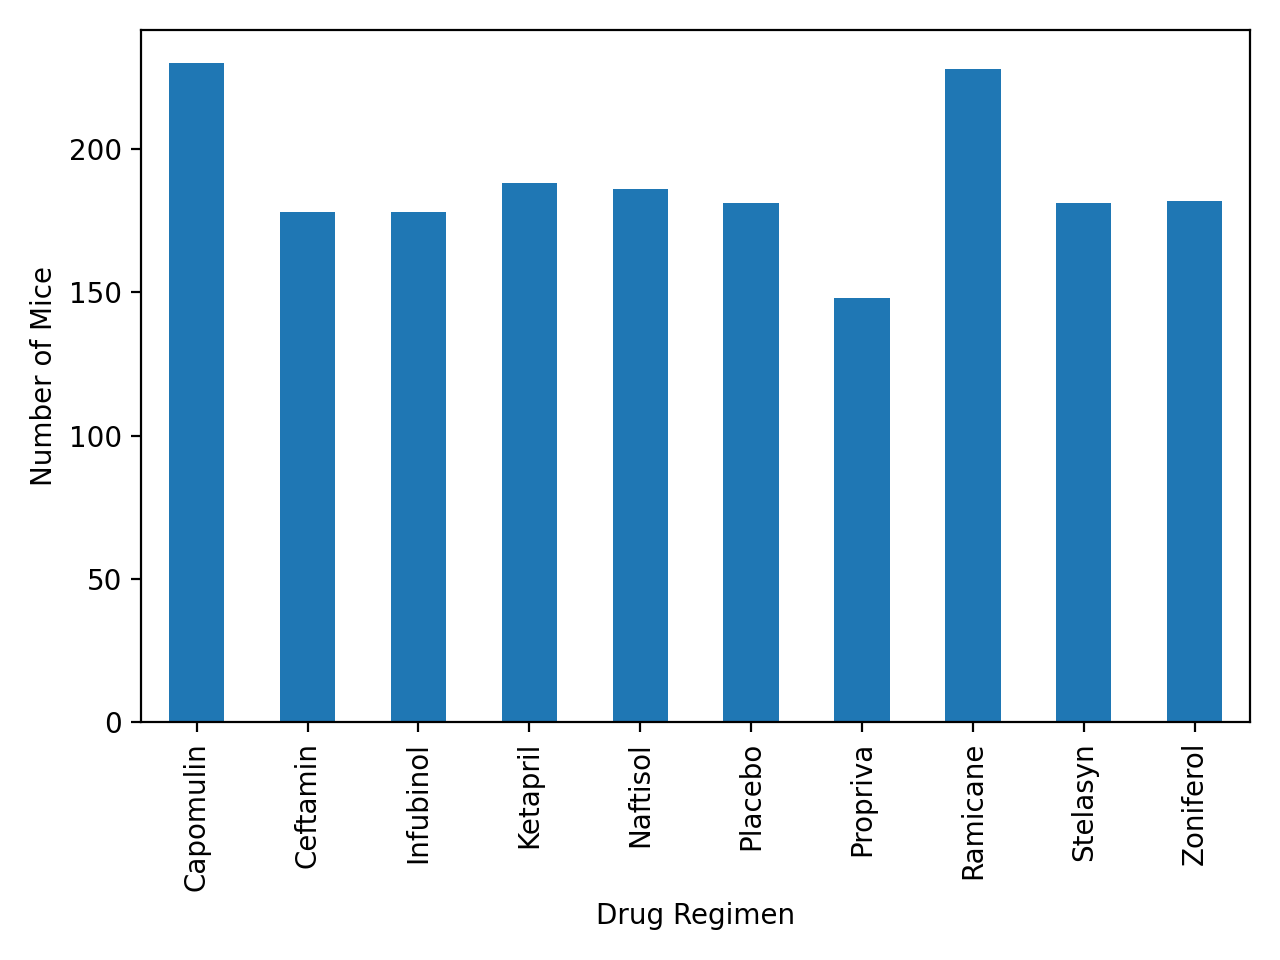

In [81]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_by_drug = combined_study_df_cleaned.groupby("Drug Regimen")["Mouse ID"].count()
mice_by_drug_bar = mice_by_drug.plot(kind="bar")
mice_by_drug_bar.set_ylabel("Number of Mice")
plt.show()
plt.tight_layout()

In [ ]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
